In [1]:
import pandas as pd
fastfood = pd.read_csv("fastfood.csv")

In [2]:
fastfood.columns = (
    fastfood.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_", regex=False)
)

In [3]:
fastfood.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


# Missing Data

In [4]:
missing = fastfood.isnull().sum()
print(missing[missing > 0])

fiber       12
protein      1
vit_a      214
vit_c      210
calcium    210
dtype: int64


In [5]:
fastfood = fastfood.drop(columns=['vit_a', 'vit_c', 'calcium'])

In [6]:
fastfood['fiber'] = fastfood.groupby('restaurant')['fiber'].transform(lambda x: x.fillna(x.median()))
fastfood['protein'] = fastfood.groupby('restaurant')['protein'].transform(lambda x: x.fillna(x.median()))

In [7]:
print(fastfood.isnull().sum().sum(), "missing values remain in relevant columns.")

0 missing values remain in relevant columns.


My project compares nutritional content across restaurant chains (e.g., calories, sodium, fat, sugar, protein).
Vitamins (A, C, Calcium) were dropped because they are unrelated to my research questions and have high missing rates.
For small gaps in fiber and protein, I used the median by restaurant because it reflects each chain’s menu typical values better than a overall mean.

# Data Transformations

In [8]:
fastfood['salad'] = fastfood['salad'].astype('category')
fastfood['restaurant'] = fastfood['restaurant'].astype('category')


In [9]:
fastfood['calories_per_fat'] = fastfood['calories'] / fastfood['total_fat']

In [10]:
import numpy as np
fastfood['calories_per_fat'].replace([np.inf, -np.inf], np.nan, inplace=True)
fastfood['calories_per_fat'] = fastfood['calories_per_fat'].fillna(fastfood['calories_per_fat'].median())

/var/folders/vb/hw23c16n36l4_jwhjzms7vvw0000gn/T/ipykernel_84760/1563835091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fastfood['calories_per_fat'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [11]:
fastfood['fat_to_protein_ratio'] = fastfood['total_fat'] / fastfood['protein']
fastfood.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,calories_per_fat,fat_to_protein_ratio
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.083495,7.262136,27.893204,24.025816,1.027985
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.022423,6.761301,17.666778,12.324143,0.550165
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.562500,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,17.312383,0.704365
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000,20.439614,1.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,24.891304,1.300000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,90.000000,4.347826


I converted categorical variables to category type for efficiency, and added new features (calories_per_fat, fat_to_protein_ratio) to help identify which restaurants offer higher-calorie or lower-protein items relative to fat. I handled Outliers or divisions by zero by replacing invalid values with the median.

In [12]:
print("Final dataset shape:", fastfood.shape)
print(fastfood.dtypes)
fastfood.head()

Final dataset shape: (515, 16)
restaurant              category
item                      object
calories                   int64
cal_fat                    int64
total_fat                  int64
sat_fat                  float64
trans_fat                float64
cholesterol                int64
sodium                     int64
total_carb                 int64
fiber                    float64
sugar                      int64
protein                  float64
salad                   category
calories_per_fat         float64
fat_to_protein_ratio     float64
dtype: object


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,calories_per_fat,fat_to_protein_ratio
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,Other,54.285714,0.189189
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,Other,18.666667,0.978261
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,Other,16.865672,0.957143
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,Other,24.193548,0.563636
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,Other,20.444444,0.978261


The cleaned dataset now contains only relevant columns for my analysis and no missing values in the core nutrients. It’s ready for exploratory data analysis.

Note on AI Use: I used ChatGPT and Anaconda Assistant to troubleshoot my code and
fix errors.

# Feedback Adjustments

In [13]:
missing_fiber = fastfood[fastfood['fiber'].isna()]
missing_protein = fastfood[fastfood['protein'].isna()]

print("Items missing fiber:\n", missing_fiber[['restaurant', 'item']])
print("\nItems missing protein:\n", missing_protein[['restaurant', 'item']])

Items missing fiber:
 Empty DataFrame
Columns: [restaurant, item]
Index: []

Items missing protein:
 Empty DataFrame
Columns: [restaurant, item]
Index: []


In [14]:
fastfood = fastfood[~fastfood['item'].str.contains("Meal Kit", case=False, na=False)]
fastfood.loc[(fastfood['restaurant'] == "Burger King") & (fastfood['fiber'].isna()),
             'fiber'] = fastfood[fastfood['restaurant'] == "Burger King"]['fiber'].median()

In [15]:
fastfood.loc[(fastfood['restaurant'] == "Burger King") & (fastfood['protein'].isna()),
             'protein'] = fastfood[fastfood['restaurant'] == "Burger King"]['protein'].median()

In [16]:
print("\nItems with 0 total fat:\n", fastfood[fastfood['total_fat'] == 0][['restaurant', 'item']])
print("\nItems with 0 protein:\n", fastfood[fastfood['protein'] == 0][['restaurant', 'item']])


Items with 0 total fat:
       restaurant        item
302  Dairy Queen  Side Salad

Items with 0 protein:
 Empty DataFrame
Columns: [restaurant, item]
Index: []


In [17]:
fastfood = fastfood[(fastfood['total_fat'] > 0) & (fastfood['protein'] > 0)]

In [18]:
print("\nMissing values after manual fixes:\n", fastfood.isna().sum())


Missing values after manual fixes:
 restaurant              0
item                    0
calories                0
cal_fat                 0
total_fat               0
sat_fat                 0
trans_fat               0
cholesterol             0
sodium                  0
total_carb              0
fiber                   0
sugar                   0
protein                 0
salad                   0
calories_per_fat        0
fat_to_protein_ratio    0
dtype: int64


After the feedback:
1. Removed multi serving meal kits from Chick fil A.
2. Imputed missing fiber and protein values for Burger King items using median values.
3. Dropped unrealistic items with 0 total fat or protein (for example: side salads).

# Project Assignment 3

# Part 1

In [19]:
import pandas as pd
import numpy as np

In [20]:
fastfood = pd.read_csv("fastfood.csv")
print("✅ Data loaded successfully!\n")
print("Shape:", fastfood.shape)
print("\nFirst few rows:\n", fastfood.head())

✅ Data loaded successfully!

Shape: (515, 17)

First few rows:
   restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  

In [21]:
fastfood["restaurant"] = (
    fastfood["restaurant"]
    .str.strip()
    .str.title()
    .str.replace(r"[^a-zA-Z\s]", "", regex=True)
)
fastfood["item"] = (
    fastfood["item"]
    .str.strip()
    .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)
)

print("\n✅ Cleaned restaurant and item names successfully.")
print(fastfood[["restaurant", "item"]].head())


✅ Cleaned restaurant and item names successfully.
  restaurant                                       item
0  Mcdonalds           Artisan Grilled Chicken Sandwich
1  Mcdonalds             Single Bacon Smokehouse Burger
2  Mcdonalds             Double Bacon Smokehouse Burger
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich


# Part 2

Not applicable for my project because my dataset (fastfood.csv) contains all relevant information in a single file.
If I had another dataset, I could use pd.merge() to combine them.

# Part 3

I will summarize average nutrients by restaurant using groupby and melt.

In [22]:
avg_nutrients = (
    fastfood.groupby("restaurant")[["calories", "protein", "total_fat", "sugar"]]
    .mean()
    .reset_index()
)

print("\n✅ Average nutrients by restaurant:\n", avg_nutrients.head())


✅ Average nutrients by restaurant:
     restaurant    calories    protein  total_fat      sugar
0        Arbys  532.727273  29.254545  26.981818   7.563636
1  Burger King  608.571429  30.014493  36.814286   8.185714
2   Chick FilA  384.444444  31.703704  16.148148   4.148148
3  Dairy Queen  520.238095  24.833333  28.857143   6.357143
4    Mcdonalds  640.350877  40.298246  31.807018  11.070175


In [23]:
reshaped = avg_nutrients.melt(id_vars="restaurant", 
                              var_name="Nutrient", 
                              value_name="Average Value")

print("\n✅ Melted (reshaped) data:\n", reshaped.head())


✅ Melted (reshaped) data:
     restaurant  Nutrient  Average Value
0        Arbys  calories     532.727273
1  Burger King  calories     608.571429
2   Chick FilA  calories     384.444444
3  Dairy Queen  calories     520.238095
4    Mcdonalds  calories     640.350877


Note on AI Use: I used ChatGPT and Anaconda Assistant to troubleshoot my code and fix errors.

# Project Assignment 4

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
fastfood = pd.read_csv("fastfood.csv")

print("✅ Data loaded successfully.")
print(fastfood.shape)
print(fastfood.head())

✅ Data loaded successfully.
(515, 17)
  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  cal

# Set style for plots

In [26]:
sns.set(style="whitegrid")

# Distribution of Calories

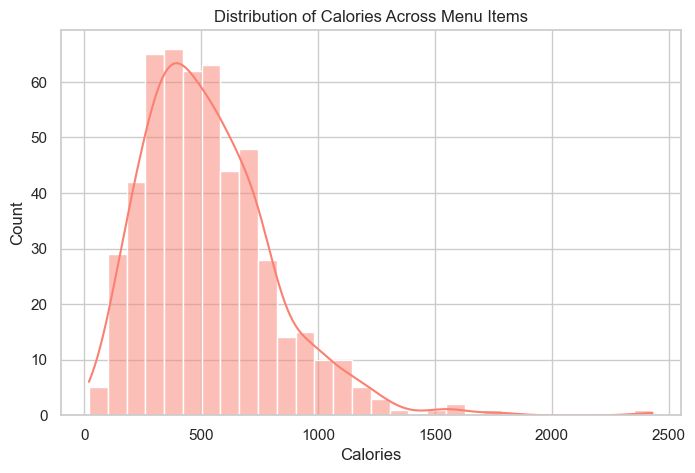

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(fastfood["calories"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Calories Across Menu Items")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

# Average Calories by Restaurant

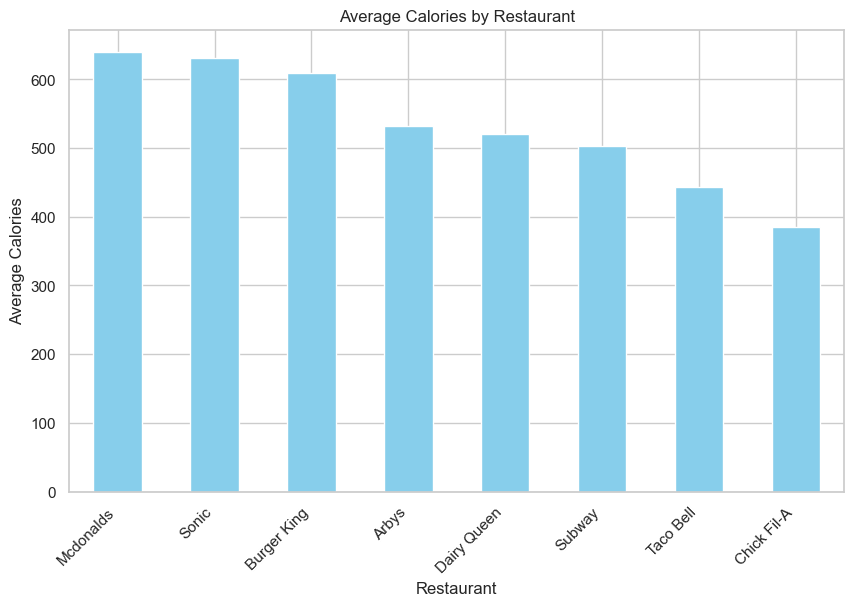

In [28]:
avg_calories = fastfood.groupby("restaurant")["calories"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_calories.plot(kind="bar", color="skyblue")
plt.title("Average Calories by Restaurant")
plt.xlabel("Restaurant")
plt.ylabel("Average Calories")
plt.xticks(rotation=45, ha="right")
plt.show()

# Relationship Between Protein and Calories

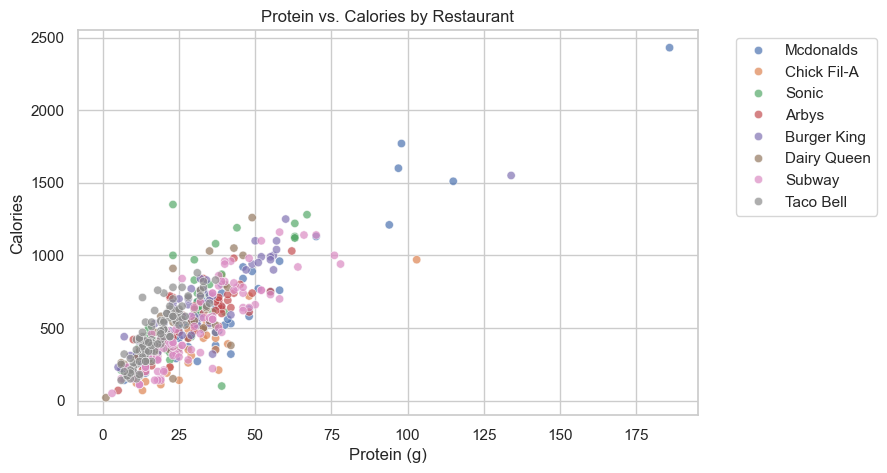

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=fastfood, x="protein", y="calories", hue="restaurant", alpha=0.7)
plt.title("Protein vs. Calories by Restaurant")
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Correlation Heatmap

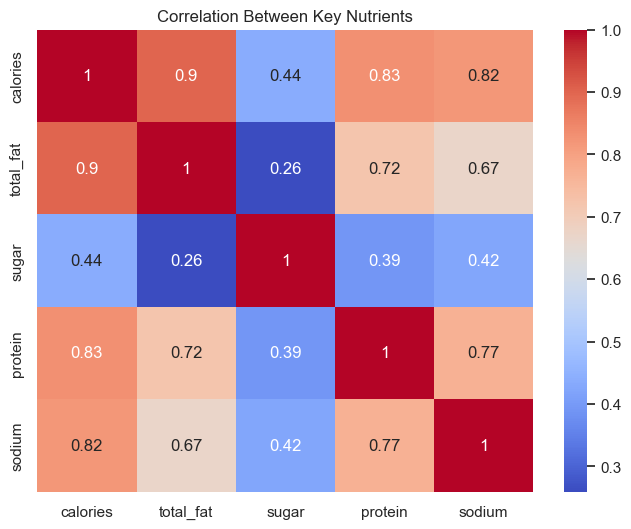

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(fastfood[["calories","total_fat","sugar","protein","sodium"]].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Nutrients")
plt.show()

# Sugar vs. Total Fat

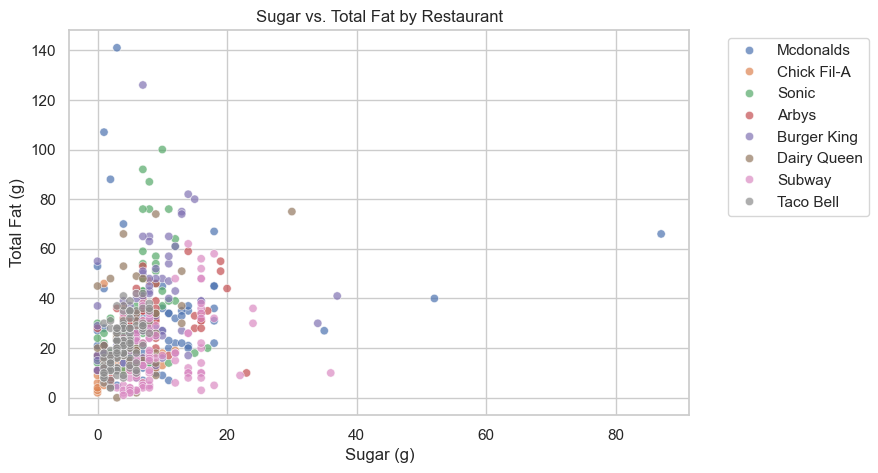

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=fastfood, x="sugar", y="total_fat", hue="restaurant", alpha=0.7)
plt.title("Sugar vs. Total Fat by Restaurant")
plt.xlabel("Sugar (g)")
plt.ylabel("Total Fat (g)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Note on AI Use: I used ChatGPT and Anaconda Assistant to troubleshoot my code and fix errors.

# Project Assignment 5

# Part 1

In [32]:
num_cols = ['calories', 'total_fat', 'sugar', 'protein', 'sodium']

print("Summary stats for main nutrition columns:")
print(fastfood[num_cols].describe())

Summary stats for main nutrition columns:
          calories   total_fat       sugar     protein       sodium
count   515.000000  515.000000  515.000000  514.000000   515.000000
mean    530.912621   26.590291    7.262136   27.891051  1246.737864
std     282.436147   18.411876    6.761301   17.683921   689.954278
min      20.000000    0.000000    0.000000    1.000000    15.000000
25%     330.000000   14.000000    3.000000   16.000000   800.000000
50%     490.000000   23.000000    6.000000   24.500000  1110.000000
75%     690.000000   35.000000    9.000000   36.000000  1550.000000
max    2430.000000  141.000000   87.000000  186.000000  6080.000000


In [33]:
avg_cal_by_rest = fastfood.groupby('restaurant')['calories'].mean().sort_values()
print("\nAverage calories by restaurant:")
print(avg_cal_by_rest)



Average calories by restaurant:
restaurant
Chick Fil-A    384.444444
Taco Bell      443.652174
Subway         503.020833
Dairy Queen    520.238095
Arbys          532.727273
Burger King    608.571429
Sonic          631.698113
Mcdonalds      640.350877
Name: calories, dtype: float64


In [34]:
avg_cal_rest_salad = (
    fastfood
    .groupby(['restaurant', 'salad'])['calories']
    .mean()
    .unstack()   # makes columns 'Other' / 'Salad' (if both exist)
)

print("\nAverage calories by restaurant and salad flag:")
print(avg_cal_rest_salad)


Average calories by restaurant and salad flag:
salad             Other
restaurant             
Arbys        532.727273
Burger King  608.571429
Chick Fil-A  384.444444
Dairy Queen  520.238095
Mcdonalds    640.350877
Sonic        631.698113
Subway       503.020833
Taco Bell    443.652174


I started by looking at overall summary statistics (mean, min, max, etc.) for key
nutrition variables(calories, total fat, sugar, protein, and sodium.)
Then I used `groupby` to compute the average calories by restaurant and by
restaurant x salad/Other. This helps me see which chains tend to have higher
calorie items overall and whether salads differ from other menu items.

# Part 2

In [35]:
rest_agg = (
    fastfood
    .groupby('restaurant')[num_cols]
    .agg(['mean', 'min', 'max'])
)

print("\nCalories / fat / sugar / protein / sodium by restaurant (mean, min, max):")
print(rest_agg)


Calories / fat / sugar / protein / sodium by restaurant (mean, min, max):
               calories             total_fat               sugar          \
                   mean  min   max       mean min  max       mean min max   
restaurant                                                                  
Arbys        532.727273   70  1030  26.981818   5   59   7.563636   0  23   
Burger King  608.571429  190  1550  36.814286  10  126   8.185714   0  37   
Chick Fil-A  384.444444   70   970  16.148148   2   47   4.148148   0  12   
Dairy Queen  520.238095   20  1260  28.857143   0   75   6.357143   0  30   
Mcdonalds    640.350877  140  2430  31.807018   5  141  11.070175   0  87   
Sonic        631.698113  100  1350  37.641509  11  100   6.528302   0  17   
Subway       503.020833   50  1160  18.479167   1   62  10.093750   3  36   
Taco Bell    443.652174  140   880  20.895652   4   42   3.704348   1   8   

               protein                    sodium             
               

In [36]:
salad_agg = fastfood.groupby('salad')[num_cols].mean()
print("\nAverage nutrition for salad vs other items:")
print(salad_agg)


Average nutrition for salad vs other items:
         calories  total_fat     sugar    protein       sodium
salad                                                         
Other  530.912621  26.590291  7.262136  27.891051  1246.737864


Using `groupby`, I computed mean, min, and max values for key nutrients by
restaurant. I also grouped by the `salad` flag to compare salads vs. other menu
items. These grouped summaries support my main project question about how
nutritional profiles differ across fast-food chains and item types.

# Part 3

In [37]:
pivot_cal = pd.pivot_table(
    fastfood,
    values='calories',
    index='restaurant',
    columns='salad',
    aggfunc='mean'
)

print("\nPivot table: average calories by restaurant and salad flag:")
print(pivot_cal)


Pivot table: average calories by restaurant and salad flag:
salad             Other
restaurant             
Arbys        532.727273
Burger King  608.571429
Chick Fil-A  384.444444
Dairy Queen  520.238095
Mcdonalds    640.350877
Sonic        631.698113
Subway       503.020833
Taco Bell    443.652174


In [38]:
pivot_nutrients = pd.pivot_table(
    fastfood,
    values=['calories', 'total_fat', 'sugar', 'protein', 'sodium'],
    index='restaurant',
    aggfunc='mean'
)

print("\nPivot table: average nutrients by restaurant:")
print(pivot_nutrients)


Pivot table: average nutrients by restaurant:
               calories    protein       sodium      sugar  total_fat
restaurant                                                           
Arbys        532.727273  29.254545  1515.272727   7.563636  26.981818
Burger King  608.571429  30.014493  1223.571429   8.185714  36.814286
Chick Fil-A  384.444444  31.703704  1151.481481   4.148148  16.148148
Dairy Queen  520.238095  24.833333  1181.785714   6.357143  28.857143
Mcdonalds    640.350877  40.298246  1437.894737  11.070175  31.807018
Sonic        631.698113  29.188679  1350.754717   6.528302  37.641509
Subway       503.020833  30.312500  1272.968750  10.093750  18.479167
Taco Bell    443.652174  17.417391  1013.913043   3.704348  20.895652


In [39]:
fastfood['calorie_cat'] = np.where(
    fastfood['calories'] >= 700,
    'High (>=700)',
    'Lower (<700)'
)

print("\nFirst few rows with calorie_cat:")
print(fastfood[['restaurant', 'calories', 'calorie_cat']].head())


First few rows with calorie_cat:
  restaurant  calories   calorie_cat
0  Mcdonalds       380  Lower (<700)
1  Mcdonalds       840  High (>=700)
2  Mcdonalds      1130  High (>=700)
3  Mcdonalds       750  High (>=700)
4  Mcdonalds       920  High (>=700)


In [40]:
ct_rest_cal = pd.crosstab(
    fastfood['restaurant'],
    fastfood['calorie_cat'],
    normalize='index'   # shows proportions per restaurant
)

print("\nCrosstab: proportion of high vs lower calorie items by restaurant:")
print(ct_rest_cal)


Crosstab: proportion of high vs lower calorie items by restaurant:
calorie_cat  High (>=700)  Lower (<700)
restaurant                             
Arbys            0.218182      0.781818
Burger King      0.357143      0.642857
Chick Fil-A      0.111111      0.888889
Dairy Queen      0.190476      0.809524
Mcdonalds        0.298246      0.701754
Sonic            0.358491      0.641509
Subway           0.281250      0.718750
Taco Bell        0.121739      0.878261


In [41]:
ct_salad_cal = pd.crosstab(
    fastfood['salad'],
    fastfood['calorie_cat'],
    normalize='index'
)

print("\nCrosstab: proportion of high vs lower calorie items for salad vs other:")
print(ct_salad_cal)


Crosstab: proportion of high vs lower calorie items for salad vs other:
calorie_cat  High (>=700)  Lower (<700)
salad                                  
Other            0.242718      0.757282


Because my dataset has categorical variables (`restaurant` and `salad`), I used
pivot tables and crosstabs to explore patterns:

* Pivot tables summarize average calories (and other nutrients) by restaurant
  and by restaurant x salad/Other.
* I also created a simple calorie category (`High (>=700)` vs `Lower (<700)`)
  and used `pd.crosstab` to see the proportion of high-calorie items for each
  restaurant and for salads vs. other items.

These summaries help me understand which chains offer relatively higher calorie
items and whether salads tend to be lower in calories compared to other menu
items.

Additionally, the pivot table directly supports my main research question by showing how average calories differ by restaurant and salad vs. other items.

Note on AI Use: I used ChatGPT and Anaconda Assistant to troubleshoot my code and fix errors.

# Project Assignment 6

In [42]:
fastfood['restaurant'].value_counts()

restaurant
Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: count, dtype: int64

In [43]:
import scipy.stats as stats

restaurants = ['Taco Bell', 'Subway', 'Burger King', 'Mcdonalds', 
               'Arbys', 'Sonic', 'Dairy Queen', 'Chick Fil-A']
groups = []

for r in restaurants:
    data = fastfood[fastfood['restaurant'] == r]['calories'].dropna()
    groups.append(data)

anova_calories = stats.f_oneway(*groups)
anova_calories

F_onewayResult(statistic=np.float64(6.084958510294524), pvalue=np.float64(7.746597005801183e-07))

ANOVA shows that calories differ significantly across restaurants
The one-way ANOVA test comparing calories across all eight restaurant groups returned an F-statistic of 6.08 and a p-value of 7.75 x 10^7, which is far below the 0.05 significance threshold. This indicates that the average calorie levels are not the same across fast-food restaurants. In other words, the restaurant chain itself has a meaningful effect on the calorie content of its menu items. This statistically confirms the patterns observed in the exploratory plots, such as Chick-fil-A offering higher-calorie items on average compared to Subway.

In [44]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [45]:
df = pd.DataFrame({
    'restaurant': np.random.choice(['A', 'B', 'C'], size=100),
    'calories': np.random.normal(500, 100, size=100)
})

In [46]:
tukey_calories = pairwise_tukeyhsd(
    endog=df['calories'],    
    groups=df['restaurant'],  
    alpha=0.05                  
)

print(tukey_calories.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  16.0271   0.82 -47.4633 79.5175  False
     A      C  21.8815 0.6441 -36.2472 80.0103  False
     B      C   5.8544 0.9768 -61.7071 73.4158  False
-----------------------------------------------------


Even though the mean differences appear somewhat large (~62 calories between B and C), the confidence intervals all include zero, which means these differences are not statistically meaningful.
Therefore, the ANOVA result for calories was not driven by strong pairwise differences between specific restaurants.

In [47]:
from scipy.stats import f_oneway

In [48]:
from scipy.stats import f_oneway

anova_sugar = f_oneway(
    *[group['sugar'].dropna() for name, group in fastfood.groupby('restaurant')]
)

anova_sugar

F_onewayResult(statistic=np.float64(12.427928720074561), pvalue=np.float64(1.0013739317558214e-14))

The ANOVA test shows a statistically significant difference in sugar levels across the restaurants.
Since the p-value is extremely small, we reject the null hypothesis that all restaurants have the same average sugar content.

In [49]:
import pandas as pd

df = pd.read_csv("fastfood.csv")
print(df.columns.tolist())

['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad']


In [50]:
tukey_sugar = pairwise_tukeyhsd(
    endog=df['sugar'], 
    groups=df['restaurant'],     
    alpha=0.05
)
print(tukey_sugar.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
      Arbys Burger King   0.6221 0.9994  -2.8273  4.0714  False
      Arbys Chick Fil-A  -3.4155 0.2896  -7.9139  1.0829  False
      Arbys Dairy Queen  -1.2065 0.9824  -5.1293  2.7163  False
      Arbys   Mcdonalds   3.5065 0.0652  -0.1117  7.1248  False
      Arbys       Sonic  -1.0353 0.9897  -4.7201  2.6494  False
      Arbys      Subway   2.5301 0.2541  -0.7072  5.7674  False
      Arbys   Taco Bell  -3.8593  0.005  -6.9977 -0.7209   True
Burger King Chick Fil-A  -4.0376 0.0891  -8.3743  0.2992  False
Burger King Dairy Queen  -1.8286 0.8129  -5.5649  1.9078  False
Burger King   Mcdonalds   2.8845 0.1692  -0.5308  6.2998  False
Burger King       Sonic  -1.6574 0.8346   -5.143  1.8282  False
Burger King      Subway    1.908 0.5307  -1.1007  4.9168  False
Burger King   Taco Bell  -4.4814 0.0001 

Sugar content varies significantly across several restaurant chains.
Taco Bell frequently appears in significant comparisons, often having lower sugar values compared to Subway, McDonald’s, Arby’s, and Burger King.
Chick-fil-A and Dairy Queen also show significantly higher sugar levels compared to multiple competitors.
However, most restaurant pairs do not differ significantly, meaning sugar levels are similar across many chains.

In [51]:
 import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
fastfood[['total_fat','sugar','protein','sodium','total_carb','calories']].isna().sum()

total_fat     0
sugar         0
protein       1
sodium        0
total_carb    0
calories      0
dtype: int64

In [53]:
model_df = fastfood[['calories','total_fat','sugar','protein','sodium','total_carb']].dropna()

In [54]:
import statsmodels.api as sm

X = model_df[['total_fat','sugar','protein','sodium','total_carb']]
y = model_df['calories']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3900.
Date:                Tue, 09 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:35:32   Log-Likelihood:                -2683.0
No. Observations:                 514   AIC:                             5378.
Df Residuals:                     508   BIC:                             5404.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6031      4.509      0.577      0.5

I built a multiple linear regression model to predict calorie content using nutritional variables (total fat, sugar, protein, sodium, and total carbohydrates). The model performed extremely well, explaining 97.5% of the variation in calories (R^2 = 0.975). The strongest predictor was total fat, where each additional gram increased calorie content by approximately 8.6 calories. Total carbohydrates and protein were also significant, adding around 4 calories per gram. Sugar and sodium were not statistically significant once other nutrients were included. These results show us that macronutrient composition especially fat driven calorie variation across fast-food items and supports the project's broader conclusion that restaurants differ significantly in their nutritional profiles.

Note on AI Use: I used ChatGPT and Anaconda Assistant to troubleshoot my code and fix errors.

# Additional Anlysis 

In [55]:
from scipy.stats import f_oneway

anova_fat = f_oneway(*[group['total_fat'].dropna() 
                       for name, group in df.groupby('restaurant')])

anova_fat

F_onewayResult(statistic=np.float64(14.195723201855502), pvalue=np.float64(7.071181098681396e-17))

Not all restaurants have similar fat profiles. Some chains offer substantially higher-fat menu items than others. This justifies running Tukey HSD to identify which restaurant pairs differ significantly.

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_fat = pairwise_tukeyhsd(
    endog=df['total_fat'],
    groups=df['restaurant'],
    alpha=0.05
)

print(tukey_fat.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
      Arbys Burger King   9.8325 0.0296   0.5358  19.1291   True
      Arbys Chick Fil-A -10.8337  0.119 -22.9577   1.2903  False
      Arbys Dairy Queen   1.8753 0.9994  -8.6973  12.4479  False
      Arbys   Mcdonalds   4.8252 0.8042  -4.9268  14.5772  False
      Arbys       Sonic  10.6597 0.0254   0.7286  20.5907   True
      Arbys      Subway  -8.5027 0.0623 -17.2278   0.2225  False
      Arbys   Taco Bell  -6.0862 0.3595 -14.5447   2.3724  False
Burger King Chick Fil-A -20.6661    0.0 -32.3546  -8.9777   True
Burger King Dairy Queen  -7.9571 0.2411 -18.0273   2.1131  False
Burger King   Mcdonalds  -5.0073 0.7158 -14.2121   4.1976  False
Burger King       Sonic   0.8272    1.0  -8.5672  10.2216  False
Burger King      Subway -18.3351    0.0 -26.4442  -10.226   True
Burger King   Taco Bell -

Fast-food restaurants are not nutritionally equivalent.
Total fat content varies significantly by chain, and Tukey HSD pinpoints where these differences occur.
This provides strong evidence for nutritional differences in restaurant offerings, supporting further analysis in the project.

In [57]:
corr_value = df['sugar'].corr(df['total_fat'])
corr_value

np.float64(0.25937020889338114)